In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('global_food_wastage_dataset.csv')

In [5]:
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


In [7]:
df.shape

(5000, 8)

In [11]:
df.columns

Index(['Country', 'Year', 'Food Category', 'Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5000 non-null   object 
 1   Year                       5000 non-null   int64  
 2   Food Category              5000 non-null   object 
 3   Total Waste (Tons)         5000 non-null   float64
 4   Economic Loss (Million $)  5000 non-null   float64
 5   Avg Waste per Capita (Kg)  5000 non-null   float64
 6   Population (Million)       5000 non-null   float64
 7   Household Waste (%)        5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5000.0,2021.015600,1.999239,2018.00,2019.0000,2021.000,2023.0000,2024.00
Total Waste (Tons),5000.0,25061.780072,14245.119588,502.61,12783.7375,24865.220,37471.0350,49990.76
Economic Loss (Million $),5000.0,25039.703870,14620.236429,406.69,12612.4775,24428.155,37146.0375,59228.93
Avg Waste per Capita (Kg),5000.0,109.463970,51.933730,20.09,64.0500,110.080,154.5250,199.97
Population (Million),5000.0,706.606416,402.546464,11.29,350.6025,713.530,1057.2550,1399.97
Household Waste (%),5000.0,50.060890,11.596203,30.02,40.0125,50.295,60.1250,70.00


In [13]:
df.isnull().sum()

Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64

In [15]:
df.duplicated().sum()

0

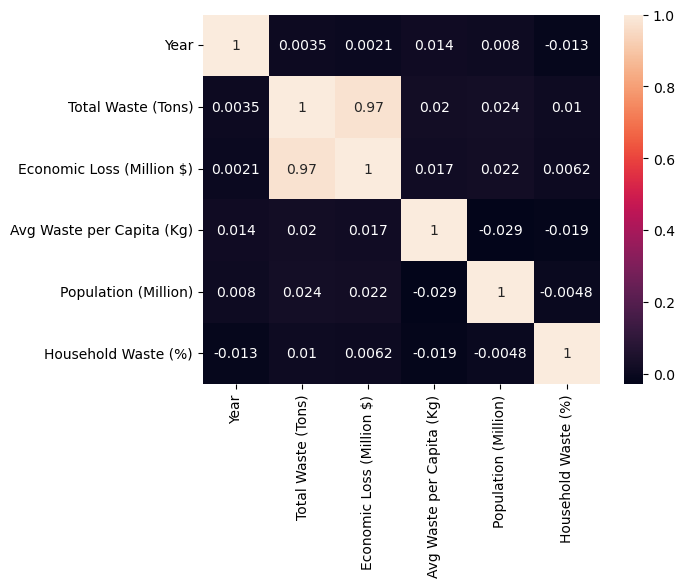

In [23]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

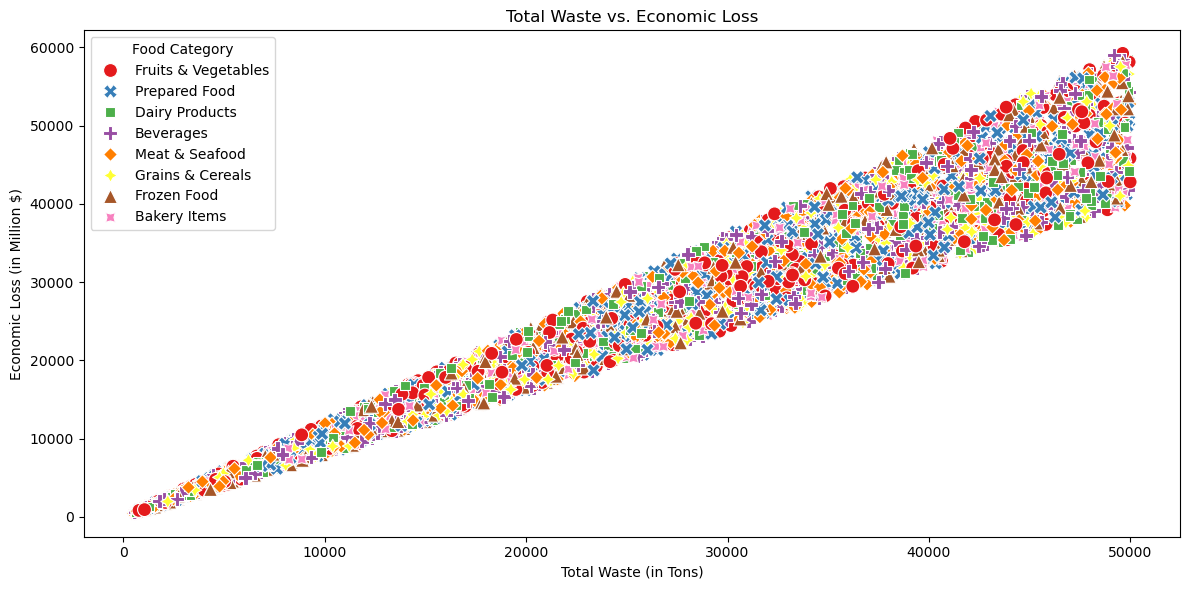

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Total Waste (Tons)', y='Economic Loss (Million $)', hue='Food Category',style='Food Category', palette='Set1', s=100)
plt.xlabel("Total Waste (in Tons)")
plt.ylabel("Economic Loss (in Million $)")
plt.title("Total Waste vs. Economic Loss")
plt.tight_layout()
plt.show()

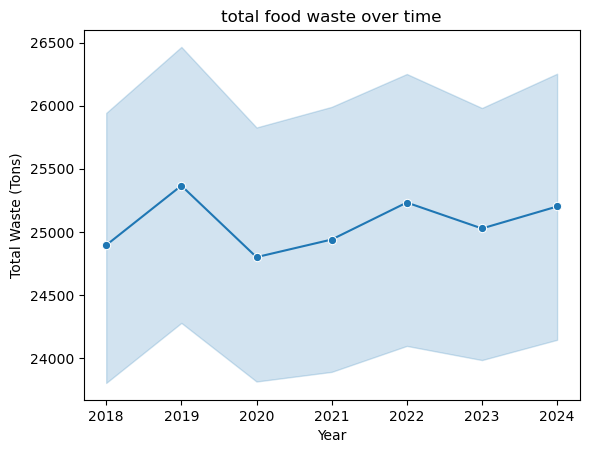

In [49]:
sns.lineplot(data=df,x='Year',y='Total Waste (Tons)',marker='o')
plt.title("total food waste over time")
plt.show()

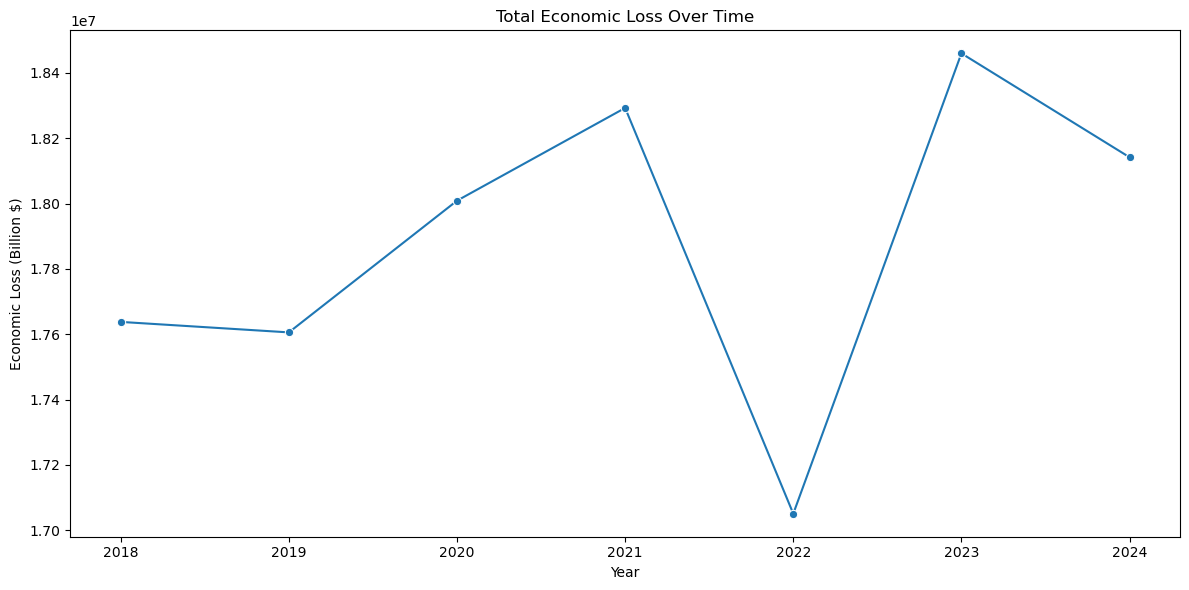

In [51]:
loss_by_year = df.groupby('Year')['Economic Loss (Million $)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=loss_by_year, x='Year', y=loss_by_year['Economic Loss (Million $)'], marker='o')
plt.xlabel("Year")
plt.ylabel("Economic Loss (Billion $)")
plt.title("Total Economic Loss Over Time")
plt.tight_layout()
plt.show()

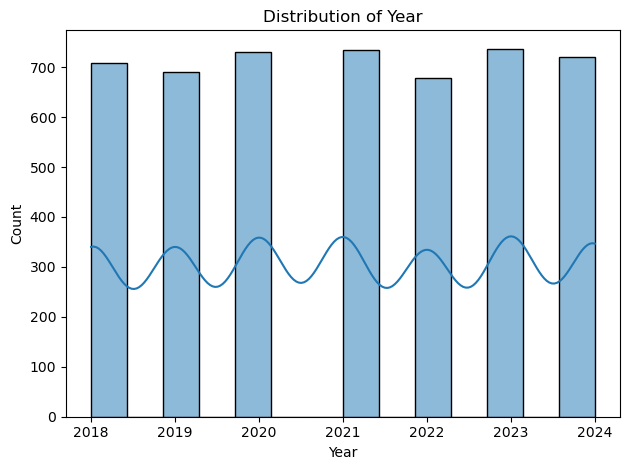

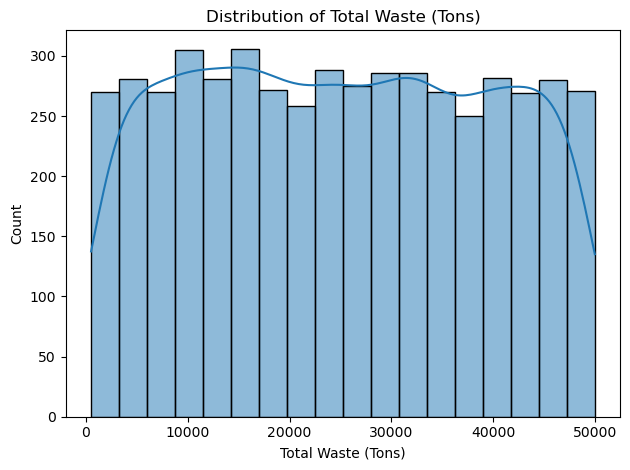

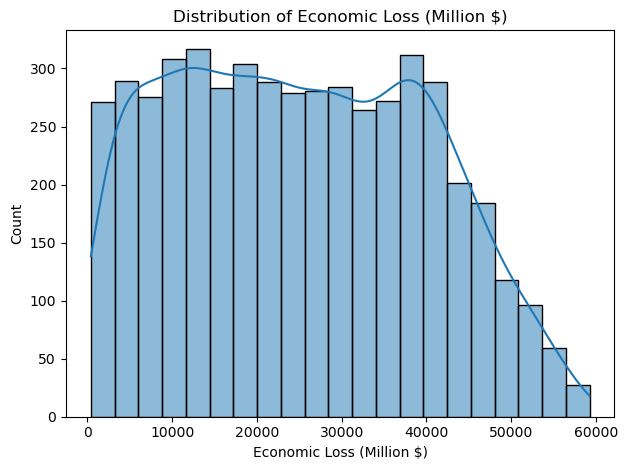

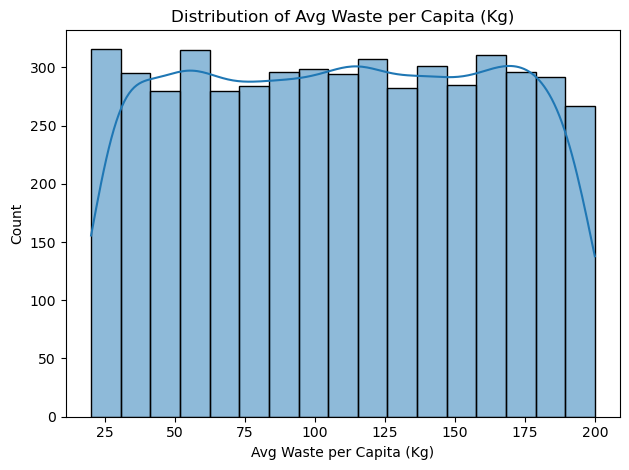

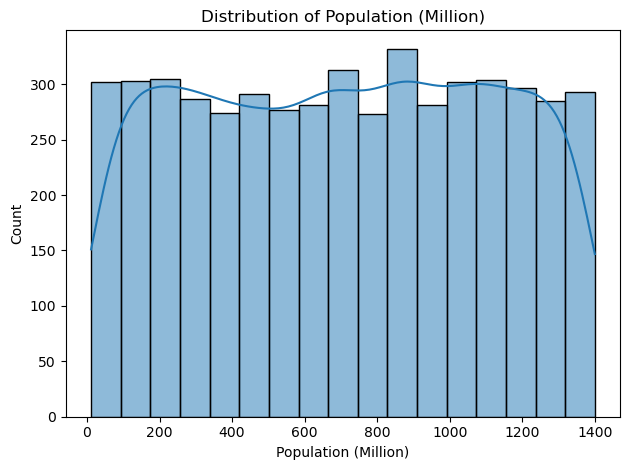

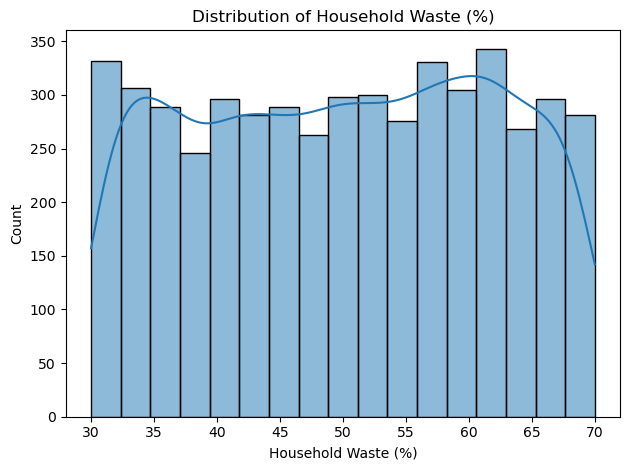

In [59]:
num_col=df.select_dtypes(include='number').columns
for col in num_col:
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [123]:
x=df.iloc[:,3:]

In [125]:
x=x.drop('Economic Loss (Million $)',axis=1)

In [127]:
x

,Total Waste (Tons),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,19268.63,72.69,87.59,53.64
1,3916.97,192.52,1153.99,30.61
2,9700.16,166.94,1006.11,48.08
3,46299.69,120.19,953.05,31.91
4,33096.57,104.74,1105.47,36.06
...,...,...,...,...
4995,47524.74,77.41,1087.46,39.73
4996,32337.72,194.35,1336.32,64.83
4997,20640.96,21.04,16.13,31.23
4998,26566.64,197.14,1086.17,69.95


In [129]:
y=df.iloc[:,-4]

In [131]:
y

0       18686.68
1        4394.48
2        8909.16
3       40551.22
4       36980.82
          ...   
4995    48058.40
4996    32705.08
4997    22485.33
4998    29357.57
4999     7360.38
Name: Economic Loss (Million $), Length: 5000, dtype: float64

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=48)

In [139]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [141]:
y_pred=model.predict(x_test)

In [153]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [155]:
print(f"Mean Abosulte Error: {mae}")
print(f"R2 Score: {r2}")

Mean Abosulte Error: 2379.9216408949387
R2 Score: 0.9520687592583637
